In [64]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

In [65]:
#oscylator z tlumieniem
x = sp.Function('x')
t = sp.Symbol('t', real=True)

x0 = sp.Symbol('x_0', real=True)  #poczatkowe polozenie
v0 = sp.Symbol('v_0', real=True)  #poczatkowa predkosc
omega0 = sp.Symbol('omega_0', positive=True)
gamma = sp.Symbol('gamma', positive=True)

x(t), t,omega0,x0,v0,gamma

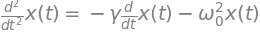

In [66]:
# oscylator z tlumieniem
osc_tlum = sp.Eq(x(t).diff(t, t), -omega0**2 * x(t) - gamma * x(t).diff(t))
osc_tlum

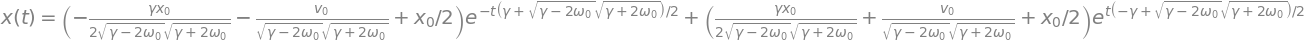

In [67]:
sol = sp.dsolve(osc_tlum, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol

In [79]:
ver1 = sp.lambdify(t, sol.rhs.subs({x0: 1, v0: 0, omega0: 1, gamma: 0.1}), 'numpy')
ver2 = sp.lambdify(t, sol.rhs.subs({x0: 1, v0: 0, omega0: 1, gamma: 0.5}), 'numpy')
ver3 = sp.lambdify(t, sol.rhs.subs({x0: 1, v0: 1, omega0: 1, gamma: 1}), 'numpy')

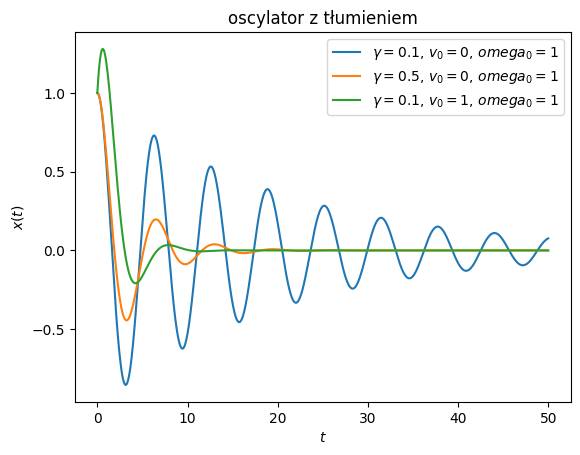

In [83]:
t_plot = np.linspace(0,50,1000)
plt.plot(t_plot, ver1(t_plot), label = '$\gamma = 0.1$, $v_0 = 0$, $omega_0 = 1$')
plt.plot(t_plot, ver2(t_plot), label= '$\gamma = 0.5$, $v_0 = 0$, $omega_0 = 1$')
plt.plot(t_plot, ver3(t_plot), label = '$\gamma = 0.1$, $v_0 = 1$, $omega_0 = 1$')
plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.title('oscylator z tłumieniem')
plt.legend()